In [48]:
def get_ylabel(filename) :
    y_label = filename.split('.')[0]
    if '_' in y_label :
        y_label = y_label.split('_')[0]
    return y_label

print('14.png =',get_ylabel('14.png'))
print('14_1.png =',get_ylabel('14_1.png'))

14.png = 14
14_1.png = 14


In [87]:
import os
from PIL import Image

X_internet = []
y_labels=[]
for root, dirs, files in os.walk('./web_data/raw'):
    for i, file in enumerate(files):
        if file.endswith('.png'):
            print('opening - ', file)
            im1 = Image.open('./web_data/raw/'+file)
            im1_scaled = im1.resize((32, 32), Image.ANTIALIAS)
            im1_scaled.save('./web_data/'+file)
            X_internet.append(np.array(im1_scaled)[:,:,0:3])
            y_labels.append(get_ylabel(file))

opening -  1.png
opening -  13.png
opening -  14.png
opening -  14_1.png
opening -  17.png
opening -  36.png


In [88]:
y_labels

['1', '13', '14', '14', '17', '36']

In [89]:
X_internet_arr = np.array(X_internet)
y_label_arr = np.array(y_labels)

In [90]:
import pickle

with open("./web_data/X_internet.pickle", "wb") as f:
    pickle.dump((X_internet_arr,y_label_arr), f)

In [91]:
f = open("./web_data/X_internet.pickle", "rb")
x_int, y_lab = pickle.load(f)

y_lab: 1
y_lab: 13
y_lab: 14
y_lab: 14
y_lab: 17
y_lab: 36


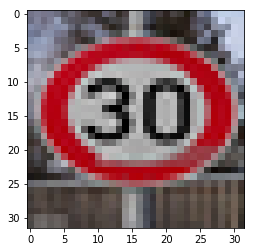

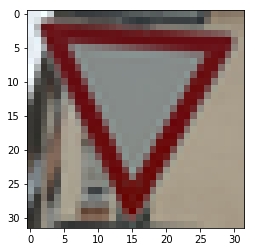

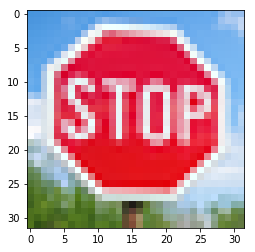

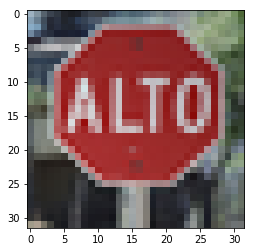

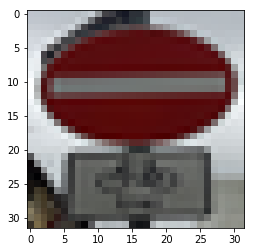

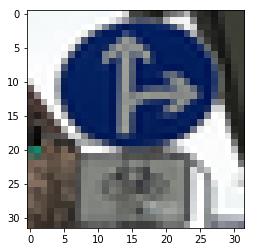

In [92]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

for i in range(0, len(x_int)):
    fig = plt.figure(i)
    plt.imshow(x_int[i])
    print('y_lab:', y_lab[i])

label1 :  -0.25
label3 :  0.75
label0 :  1.75


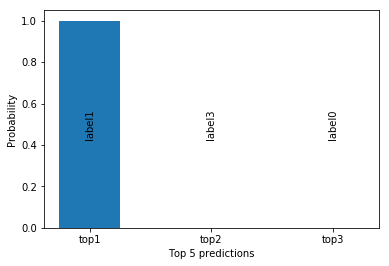

In [113]:



# try plotting bar graphs
indx=[1,3,0]
signs=['label0','label1','label2','label3']
prob=[1.0,4.14485e-17,2.10841e-17]

ind = np.arange(3)
f,ax = plt.subplots()

bars = ax.bar(ind, prob, width=0.5)
ax.set_xticks(ind)
ax.set_xticklabels(('top1','top2','top3','top4','top5'))
ax.set_ylabel('Probability')
ax.set_xlabel('Top 5 predictions')

for i,bar in zip(ind,bars) :
    print(signs[indx[i]],': ', bar.get_x())
    ax.text(bar.get_x()+bar.get_width()/2, bars[0].get_height()/2, '%s' % signs[indx[i]],
           ha='center', va='center', rotation='vertical')

In [98]:
ind = np.arange(3)

width=0.5

ind+ width/2

array([ 0.25,  1.25,  2.25])

In [99]:
ind

array([0, 1, 2])